In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
# langchain
from langchain_upstage import ChatUpstage

query = "인프런에는 어떤 강의가 있나요?"

llm = ChatUpstage()
llm.invoke(query)

### 1. state, graph_builder 정의

In [4]:
# langgraph
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]
    
graph_builder = StateGraph(AgentState)

In [5]:
from langchain_upstage import ChatUpstage

llm = ChatUpstage()

def generate(state: AgentState) -> AgentState:
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [6]:
from langgraph.graph import START,END

graph_builder.add_node('generate', generate)

In [7]:
from langgraph.graph import START,END

graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [8]:
graph = graph_builder.compile()

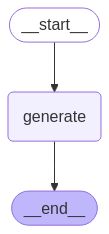

In [9]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
from langchain_core.messages import HumanMessage

query = "인프런에는 어떤 강의가 있나요?"
initial_state = {'messages': [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [AIMessage(content='인프런에는 다양한 분야의 프로그래밍, 디자인, 비즈니스, 그리고 창작 관련 강의가 있습니다. 주요 카테고리는 다음과 같습니다:\n\n1. **프로그래밍**: 웹 개발, 모바일 개발, 데이터 과학, 인공지능, 클라우드 컴퓨팅 등 다양한 프로그래밍 언어를 배울 수 있는 강의가 있습니다.\n\n2. **디자인**: 웹 디자인, UX/UI 디자인, 그래픽 디자인, 3D 모델링 등 디자인 관련 강의를 제공합니다.\n\n3. **비즈니스**: 데이터 분석, 마케팅, 경영, 프로젝트 관리 등 비즈니스 관련 스킬을 키울 수 있는 강의가 있습니다.\n\n4. **창작**: 영상 편집, 음악 제작, 글쓰기, 게임 개발 등 창의적인 분야의 강의를 제공합니다.\n\n이 외에도 특정 기술이나 도구에 대한 강의도 많이 있습니다. 인프런 홈페이지에서 상세한 카테고리와 강의 목록을 확인할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 184, 'prompt_tokens': 19, 'total_tokens': 203, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'solar-mini-250422', 'system_fingerprint': None, 'id': '636d38a6-aca9-4ffc-8493-c1e6fefa4a68', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--1c348588-7b18-4b3f-8f76-e15c7e2f394e-0', usage_metadata={'input_tokens': 19, 'output_tokens': 184, 'total_tokens': 203, 'input_token_de